<a href="https://colab.research.google.com/github/Uzo-Felix/private_repos/blob/main/Best_EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

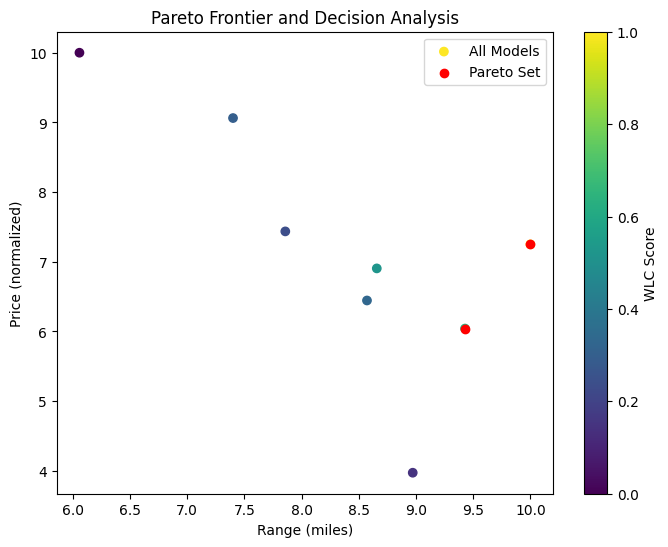

                 Model  WLC_Score  Distance_to_Ideal
0        Tesla Model 3   9.162500           2.750000
1        Tesla Model Y   8.569411           4.110400
4      Hyundai Ioniq 5   8.376190           3.761649
2  Ford Mustang Mach-E   8.060635           4.453614
3    Chevrolet Bolt EV   8.004196           4.637223
5      Volkswagen ID.4   7.905760           4.644460
7           Rivian R1T   7.752674           6.492524
6          Nissan Leaf   7.514286           6.505785


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

# Define EV data (Price, Range, Charging Time, Safety, Tech Features)
data = {
    'Model': ['Tesla Model 3', 'Tesla Model Y', 'Ford Mustang Mach-E', 'Chevrolet Bolt EV',
              'Hyundai Ioniq 5', 'Volkswagen ID.4', 'Nissan Leaf', 'Rivian R1T'],
    'Price': [40000, 48000, 45000, 32000, 42000, 39000, 29000, 73000],
    'Range': [350, 330, 300, 259, 303, 275, 212, 314],
    'Charging Time': [25, 27, 30, 35, 28, 32, 40, 30],
    'Safety': [5, 5, 4.8, 4.7, 5, 4.9, 4.5, 5],
    'Tech Features': [9, 9, 8, 7, 8, 7, 6, 9]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Normalization (Price and Charging Time are minimization criteria)
df['Price'] = 10 * (df['Price'].min() / df['Price'])
df['Range'] = 10 * (df['Range'] / df['Range'].max())
df['Charging Time'] = 10 * (df['Charging Time'].min() / df['Charging Time'])
df['Safety'] = df['Safety'] * 2  # Convert to 0-10 scale

# Define weights
weights = np.array([0.25, 0.25, 0.20, 0.15, 0.15])

# Calculate weighted linear combination
df['WLC_Score'] = df.iloc[:, 1:].dot(weights)

# Determine ideal point
ideal_point = df.iloc[:, 1:].max()

def weighted_distance(row):
    return euclidean(row[1:], ideal_point)

df['Distance_to_Ideal'] = df.apply(weighted_distance, axis=1)

# Identify Pareto-efficient alternatives
pareto_front = df[(df['WLC_Score'] >= df['WLC_Score'].quantile(0.75))]

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df['Range'], df['Price'], c=df['WLC_Score'], cmap='viridis', label='All Models')
plt.scatter(pareto_front['Range'], pareto_front['Price'], color='red', label='Pareto Set')
plt.colorbar(label='WLC Score')
plt.xlabel('Range (miles)')
plt.ylabel('Price (normalized)')
plt.legend()
plt.title('Pareto Frontier and Decision Analysis')
plt.show()

# Display final rankings
print(df[['Model', 'WLC_Score', 'Distance_to_Ideal']].sort_values(by='WLC_Score', ascending=False))